In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/camilousa/datasets/refs/heads/master/spam.csv",
                 sep="\t")
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
vectorizador = CountVectorizer()
vectorizador.fit(train["Message"])

CountVectorizer()

In [6]:
vectorizador.vocabulary_

{'hey': 900,
 'booked': 340,
 'the': 1870,
 'kb': 1030,
 'on': 1354,
 'sat': 1610,
 'already': 209,
 'what': 2074,
 'other': 1379,
 'lessons': 1088,
 'are': 242,
 'we': 2054,
 'going': 827,
 'for': 771,
 'ah': 192,
 'keep': 1031,
 'your': 2163,
 'night': 1308,
 'free': 780,
 'need': 1292,
 'to': 1912,
 'meet': 1192,
 'and': 223,
 'confirm': 506,
 'our': 1381,
 'lodging': 1115,
 'don': 630,
 'think': 1883,
 'so': 1722,
 'you': 2162,
 'be': 302,
 'out': 1382,
 'that': 1868,
 'late': 1066,
 'school': 1618,
 'especially': 697,
 'when': 2077,
 'one': 1357,
 'class': 465,
 'have': 881,
 'is': 989,
 'missed': 1225,
 'last': 1064,
 'wednesday': 2059,
 'probably': 1481,
 'failed': 729,
 'test': 1857,
 'in': 971,
 'friday': 784,
 'want': 2039,
 'explicit': 723,
 'sex': 1655,
 '30': 103,
 'secs': 1631,
 'ring': 1575,
 '02073162414': 4,
 'now': 1325,
 'costs': 527,
 '20p': 77,
 'min': 1212,
 'gsex': 844,
 'pobox': 1445,
 '2667': 86,
 'wc1n': 2053,
 '3xx': 114,
 'oh': 1346,
 'all': 206,
 'come': 48

In [7]:
X_train = vectorizador.transform(train["Message"])

In [8]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(524, 2180))

In [9]:
word_index = {v: k for k, v in vectorizador.vocabulary_.items()}
print(f"Word at index 0: {word_index[0]}")

Word at index 0: 000


In [10]:
vectorizador.transform(["Hello, how are you?"]).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 2180))

In [11]:
print(f"Index for 'go': {vectorizador.vocabulary_.get('go', 'Not found')}")

Index for 'go': 822


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1️⃣ Carga de datos
df = pd.read_csv("https://raw.githubusercontent.com/camilousa/datasets/refs/heads/master/spam.csv", sep="\t")
X = df["Message"]
y = df["Type"].map({"ham": 0, "spam": 1})

# 2️⃣ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3️⃣ Pipeline: TF-IDF + KNN
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("knn", KNeighborsClassifier(n_neighbors=15))
])

# 4️⃣ Cross‑validation (5 folds)
cv_results = cross_validate(
    pipeline, 
    X_train, 
    y_train, 
    cv=5, 
    scoring=["accuracy","precision","recall","f1"],
    return_train_score=True
)

# Mostrar resultados de CV
for metric in ["accuracy","precision","recall","f1"]:
    mean = cv_results[f"test_{metric}"].mean()
    std  = cv_results[f"test_{metric}"].std()
    print(f"CV {metric.capitalize()}: {mean:.3f} ± {std:.3f}")

# 5️⃣ Entrenar final y evaluar sobre test
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


CV Accuracy: 0.927 ± 0.012
CV Precision: 0.881 ± 0.103
CV Recall: 0.458 ± 0.065
CV F1: 0.599 ± 0.068

Test Accuracy: 0.9329268292682927
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       144
           1       1.00      0.45      0.62        20

    accuracy                           0.93       164
   macro avg       0.96      0.72      0.79       164
weighted avg       0.94      0.93      0.92       164



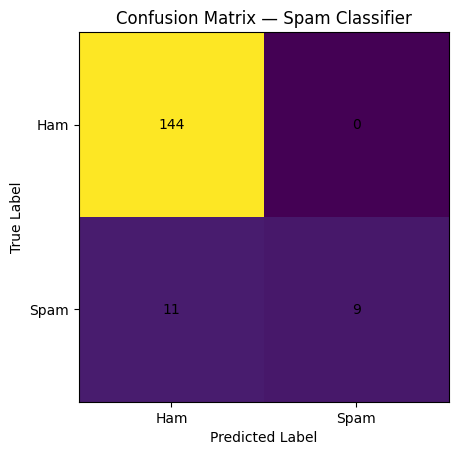

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
ax.imshow(cm)

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Ham','Spam'])
ax.set_yticklabels(['Ham','Spam'])

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center')

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix — Spam Classifier')
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# 1️⃣ Definir grid de hiperparámetros (k impares de 1 a 51)
param_grid = {"knn__n_neighbors": list(range(1, 52, 2))}

# 2️⃣ GridSearchCV sobre tu pipeline de spam
grid = GridSearchCV(
    pipeline,           # tu Pipeline("tfidf", "knn")
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# 3️⃣ Ajustar solo sobre train
grid.fit(X_train, y_train)

# 4️⃣ Extraer mejor k y CV score
best_k = grid.best_params_["knn__n_neighbors"]
best_cv_score = grid.best_score_
print(f"🔍 Mejor n_neighbors = {best_k} (CV accuracy = {best_cv_score:.3f})")

# 5️⃣ Evaluar en test
final_model = grid.best_estimator_
test_accuracy = final_model.score(X_test, y_test)
print(f"✅ Test accuracy con k={best_k}: {test_accuracy:.3f}")

# 6️⃣ (Opcional) Informe completo en test
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

🔍 Mejor n_neighbors = 1 (CV accuracy = 0.947)
✅ Test accuracy con k=1: 0.933

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       144
           1       0.80      0.60      0.69        20

    accuracy                           0.93       164
   macro avg       0.87      0.79      0.82       164
weighted avg       0.93      0.93      0.93       164

